In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file_path = ".\AUTO_Logitech_Gaming_Keyboard_G213_1ms_1.csv"
data_start_line = 15 
data = pd.read_csv(file_path, sep=';', skiprows=data_start_line)

data.head()

,counter,latency,delayTime
0,0,2978,1918
1,1,2986,892
2,2,2362,1513
3,3,2273,4591
4,4,2266,1477


In [3]:
gk_latency_mean = data['latency'].mean()
gk_latency_std = data['latency'].std()

print(f"Mittelwert: {gk_latency_mean}")
print(f"Standardabweichung: {gk_latency_std}")

Mittelwert: 2548.169
Standardabweichung: 342.3906303957262


In [4]:
gk_latency_mean_ms = gk_latency_mean / 1000
gk_latency_std_ms = gk_latency_std / 1000

print(f"Mittelwert in Millisekunden: {gk_latency_mean_ms}")
print(f"Standardabweichung in Millisekunden: {gk_latency_std_ms}")

Mittelwert in Millisekunden: 2.5481689999999997
Standardabweichung in Millisekunden: 0.3423906303957262


In [5]:
# Parameter der Simulation
n_simulationen = 10000  # Anzahl der Monte-Carlo-Läufe

# fürn Bildschirm
refresh_cycle_min = 0  # Minimaler Zeitwert innerhalb eines Refresh-Cycles
refresh_cycle_max = 16.66  # Maximaler Zeitwert innerhalb eines Refresh-Cycles
constant_delay_min = 5  # Mindestverzögerung in ms
constant_delay_max = 12

compatible_mean = 462.11
compatible_std = 119.2
incompatible_mean = 524.15
incompatible_std = 119.94

In [6]:
refresh_cycle_delay = np.random.uniform(refresh_cycle_min, refresh_cycle_max, n_simulationen)
constant_delay = np.random.uniform(constant_delay_min, constant_delay_max, n_simulationen)
bildschirm_latenzen = refresh_cycle_delay + constant_delay

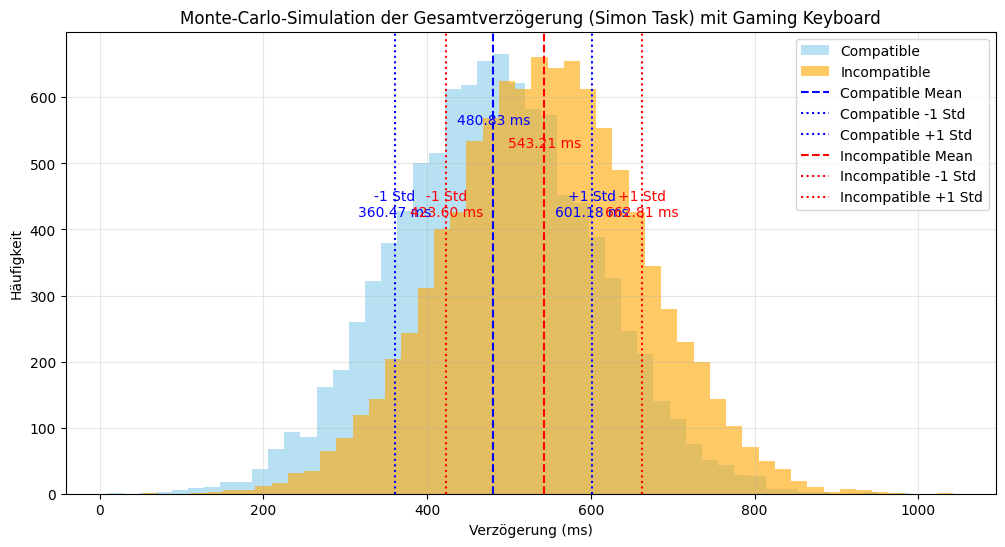

Compatible - Mittelwert der Gesamtverzögerung: 480.83 ms
Compatible - Standardabweichung der Gesamtverzögerung: 120.36 ms
Incompatible - Mittelwert der Gesamtverzögerung: 543.21 ms
Incompatible - Standardabweichung der Gesamtverzögerung: 119.61 ms


In [8]:
eingabe_latenzen = np.random.normal(gk_latency_mean_ms, gk_latency_std_ms, n_simulationen)

compatible_reactions = np.random.normal(compatible_mean, compatible_std, n_simulationen)
incompatible_reactions = np.random.normal(incompatible_mean, incompatible_std, n_simulationen)

gesamtverzögerung_compatible = bildschirm_latenzen + eingabe_latenzen + compatible_reactions
gesamtverzögerung_incompatible = bildschirm_latenzen + eingabe_latenzen + incompatible_reactions

# Statistische Kennzahlen der Simulation
compatible_mean_final = np.mean(gesamtverzögerung_compatible)
compatible_std_final = np.std(gesamtverzögerung_compatible)
incompatible_mean_final = np.mean(gesamtverzögerung_incompatible)
incompatible_std_final = np.std(gesamtverzögerung_incompatible)

# Plot des Histogramms
plt.figure(figsize=(12, 6))
plt.hist(gesamtverzögerung_compatible, bins=50, alpha=0.6, label='Compatible', color='skyblue')
plt.hist(gesamtverzögerung_incompatible, bins=50, alpha=0.6, label='Incompatible', color='orange')

# Linien für Mittelwerte und Standardabweichungen
# Compatible
plt.axvline(compatible_mean_final, color='blue', linestyle='--', linewidth=1.5, label='Compatible Mean')
plt.axvline(compatible_mean_final - compatible_std_final, color='blue', linestyle=':', linewidth=1.5, label='Compatible -1 Std')
plt.axvline(compatible_mean_final + compatible_std_final, color='blue', linestyle=':', linewidth=1.5, label='Compatible +1 Std')

plt.text(compatible_mean_final, plt.ylim()[1]*0.8, f'{compatible_mean_final:.2f} ms', color='blue', ha='center', fontsize=10)
plt.text(compatible_mean_final - compatible_std_final, plt.ylim()[1]*0.6, f'-1 Std\n{compatible_mean_final-compatible_std_final:.2f} ms', 
         color='blue', ha='center', fontsize=10)
plt.text(compatible_mean_final + compatible_std_final, plt.ylim()[1]*0.6, f'+1 Std\n{compatible_mean_final+compatible_std_final:.2f} ms', 
         color='blue', ha='center', fontsize=10)

# Incompatible
plt.axvline(incompatible_mean_final, color='red', linestyle='--', linewidth=1.5, label='Incompatible Mean')
plt.axvline(incompatible_mean_final - incompatible_std_final, color='red', linestyle=':', linewidth=1.5, label='Incompatible -1 Std')
plt.axvline(incompatible_mean_final + incompatible_std_final, color='red', linestyle=':', linewidth=1.5, label='Incompatible +1 Std')

plt.text(incompatible_mean_final, plt.ylim()[1]*0.75, f'{incompatible_mean_final:.2f} ms', color='red', ha='center', fontsize=10)
plt.text(incompatible_mean_final - incompatible_std_final, plt.ylim()[1]*0.6, f'-1 Std\n{incompatible_mean_final-incompatible_std_final:.2f} ms', 
         color='red', ha='center', fontsize=10)
plt.text(incompatible_mean_final + incompatible_std_final, plt.ylim()[1]*0.6, f'+1 Std\n{incompatible_mean_final+incompatible_std_final:.2f} ms', 
         color='red', ha='center', fontsize=10)

# Diagramm-Details
plt.title('Monte-Carlo-Simulation der Gesamtverzögerung (Simon Task) mit Gaming Keyboard')
plt.xlabel('Verzögerung (ms)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Compatible - Mittelwert der Gesamtverzögerung: {compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung: {compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung: {incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung: {incompatible_std_final:.2f} ms")

In [10]:
# Acer Tastatur: Langsam
file_path = ".\AUTO_6312kw_0ms_1.csv"
data_start_line = 7
data = pd.read_csv(file_path, sep=';', skiprows=data_start_line)

data.head()

,counter,latency,delayTime
0,0,39583,8299
1,1,45107,2800
2,2,31571,316
3,3,45996,1999
4,4,64480,7435


In [11]:
acer_latency_mean = data['latency'].mean()
acer_latency_std = data['latency'].std()

print(f"Mittelwert: {acer_latency_mean}")
print(f"Standardabweichung: {acer_latency_std}")

Mittelwert: 49213.317
Standardabweichung: 13942.476831061822


In [12]:
acer_latency_mean_ms = acer_latency_mean / 1000
acer_latency_std_ms = acer_latency_std / 1000

print(f"Mittelwert in Millisekunden: {acer_latency_mean_ms}")
print(f"Standardabweichung in Millisekunden: {acer_latency_std_ms}")

Mittelwert in Millisekunden: 49.213317
Standardabweichung in Millisekunden: 13.942476831061821


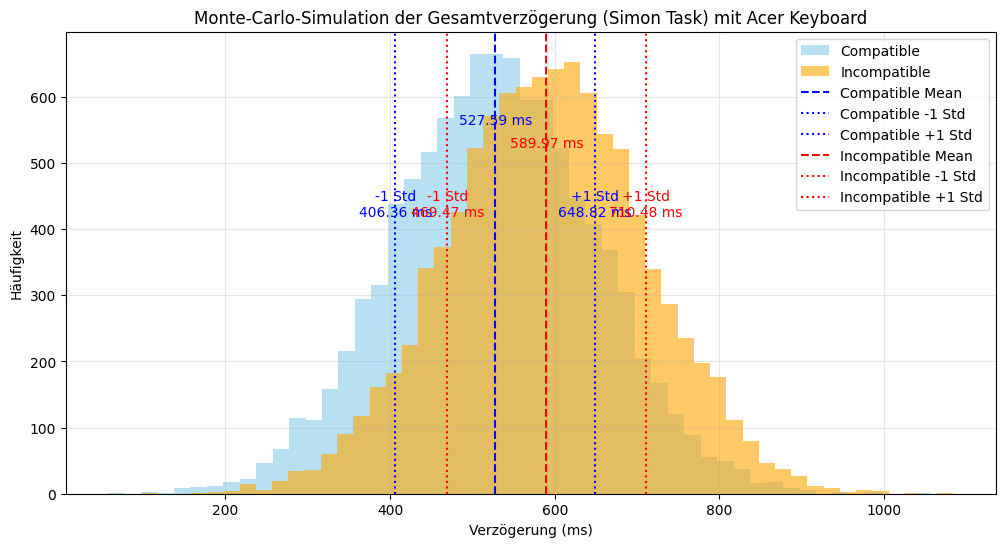

Compatible - Mittelwert der Gesamtverzögerung: 527.59 ms
Compatible - Standardabweichung der Gesamtverzögerung: 121.23 ms
Incompatible - Mittelwert der Gesamtverzögerung: 589.97 ms
Incompatible - Standardabweichung der Gesamtverzögerung: 120.50 ms


In [13]:
eingabe_latenzen = np.random.normal(acer_latency_mean_ms, acer_latency_std_ms, n_simulationen)

gesamtverzögerung_compatible = bildschirm_latenzen + eingabe_latenzen + compatible_reactions
gesamtverzögerung_incompatible = bildschirm_latenzen + eingabe_latenzen + incompatible_reactions

# Statistische Kennzahlen der Simulation
compatible_mean_final = np.mean(gesamtverzögerung_compatible)
compatible_std_final = np.std(gesamtverzögerung_compatible)
incompatible_mean_final = np.mean(gesamtverzögerung_incompatible)
incompatible_std_final = np.std(gesamtverzögerung_incompatible)

# Plot des Histogramms
plt.figure(figsize=(12, 6))
plt.hist(gesamtverzögerung_compatible, bins=50, alpha=0.6, label='Compatible', color='skyblue')
plt.hist(gesamtverzögerung_incompatible, bins=50, alpha=0.6, label='Incompatible', color='orange')

# Linien für Mittelwerte und Standardabweichungen
# Compatible
plt.axvline(compatible_mean_final, color='blue', linestyle='--', linewidth=1.5, label='Compatible Mean')
plt.axvline(compatible_mean_final - compatible_std_final, color='blue', linestyle=':', linewidth=1.5, label='Compatible -1 Std')
plt.axvline(compatible_mean_final + compatible_std_final, color='blue', linestyle=':', linewidth=1.5, label='Compatible +1 Std')

plt.text(compatible_mean_final, plt.ylim()[1]*0.8, f'{compatible_mean_final:.2f} ms', color='blue', ha='center', fontsize=10)
plt.text(compatible_mean_final - compatible_std_final, plt.ylim()[1]*0.6, f'-1 Std\n{compatible_mean_final-compatible_std_final:.2f} ms', 
         color='blue', ha='center', fontsize=10)
plt.text(compatible_mean_final + compatible_std_final, plt.ylim()[1]*0.6, f'+1 Std\n{compatible_mean_final+compatible_std_final:.2f} ms', 
         color='blue', ha='center', fontsize=10)

# Incompatible
plt.axvline(incompatible_mean_final, color='red', linestyle='--', linewidth=1.5, label='Incompatible Mean')
plt.axvline(incompatible_mean_final - incompatible_std_final, color='red', linestyle=':', linewidth=1.5, label='Incompatible -1 Std')
plt.axvline(incompatible_mean_final + incompatible_std_final, color='red', linestyle=':', linewidth=1.5, label='Incompatible +1 Std')

plt.text(incompatible_mean_final, plt.ylim()[1]*0.75, f'{incompatible_mean_final:.2f} ms', color='red', ha='center', fontsize=10)
plt.text(incompatible_mean_final - incompatible_std_final, plt.ylim()[1]*0.6, f'-1 Std\n{incompatible_mean_final-incompatible_std_final:.2f} ms', 
         color='red', ha='center', fontsize=10)
plt.text(incompatible_mean_final + incompatible_std_final, plt.ylim()[1]*0.6, f'+1 Std\n{incompatible_mean_final+incompatible_std_final:.2f} ms', 
         color='red', ha='center', fontsize=10)

# Diagramm-Details
plt.title('Monte-Carlo-Simulation der Gesamtverzögerung (Simon Task) mit Acer Keyboard')
plt.xlabel('Verzögerung (ms)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Compatible - Mittelwert der Gesamtverzögerung: {compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung: {compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung: {incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung: {incompatible_std_final:.2f} ms")

In [68]:
def monte_carlo_kde_plot(keyboard1_data, keyboard2_data):
    plt.figure(figsize=(14, 8))
    
    compatible_means = []
    incompatible_means = []

    # Simulate for both keyboards
    for kbd in [keyboard1_data, keyboard2_data]:
        # Simulate input latencies
        eingabe_latenzen = np.random.normal(
            kbd['gk_latency_mean_ms'], 
            kbd['gk_latency_std_ms'], 
            kbd['n_simulationen']
        )
        
        # Simulate reaction times
        compatible_reactions = np.random.normal(
            kbd['compatible_mean'], 
            kbd['compatible_std'], 
            kbd['n_simulationen']
        )
        incompatible_reactions = np.random.normal(
            kbd['incompatible_mean'], 
            kbd['incompatible_std'], 
            kbd['n_simulationen']
        )
        
        # Assume constant screen latency (you may adjust if needed)
        bildschirm_latenzen = 10  # example value
        
        # Calculate total delay
        gesamtverzögerung_compatible = bildschirm_latenzen + eingabe_latenzen + compatible_reactions
        gesamtverzögerung_incompatible = bildschirm_latenzen + eingabe_latenzen + incompatible_reactions
        
        # Plot KDE
        sns.kdeplot(
            gesamtverzögerung_compatible, 
            color=kbd['compatible_color'], 
            label=f'{kbd["label"]} Compatible', 
            linewidth=2,
            fill=True,
            alpha=0.3
        )
        sns.kdeplot(
            gesamtverzögerung_incompatible, 
            color=kbd['incompatible_color'], 
            label=f'{kbd["label"]} Incompatible', 
            linewidth=2,
            fill=True,
            alpha=0.3
        )
        
        # Add mean annotations
        compatible_means.append(np.mean(gesamtverzögerung_compatible))
        incompatible_means.append(np.mean(gesamtverzögerung_incompatible))

    # Plotting means with consistent positioning
    y_max = plt.ylim()[1]
    plt.axvline(compatible_means[0], color=keyboard1_data['compatible_color'], linestyle='--', linewidth=1.5)
    plt.text(0.003, y_max * 0.9, 
            f'{keyboard1_data["label"]} Compatible Mean: {compatible_means[0]:.2f} ms', 
            color=keyboard1_data['compatible_color'], 
            ha='center', va='bottom')
    
    plt.axvline(incompatible_means[0], color=keyboard1_data['incompatible_color'], linestyle='--', linewidth=1.5)
    plt.text(0.004, y_max * 0.8, 
            f'{keyboard1_data["label"]} Incompatible Mean: {incompatible_means[0]:.2f} ms', 
            color=keyboard1_data['incompatible_color'], 
            ha='center', va='bottom')
    
    plt.axvline(compatible_means[1], color=keyboard2_data['compatible_color'], linestyle='--', linewidth=1.5)
    plt.text(0.004, y_max * 0.7, 
            f'{keyboard2_data["label"]} Compatible Mean: {compatible_means[1]:.2f} ms', 
            color=keyboard2_data['compatible_color'], 
            ha='center', va='bottom')
    
    plt.axvline(incompatible_means[1], color=keyboard2_data['incompatible_color'], linestyle='--', linewidth=1.5)
    plt.text(0.004, y_max * 0.6, 
            f'{keyboard2_data["label"]} Incompatible Mean: {incompatible_means[1]:.2f} ms', 
            color=keyboard2_data['incompatible_color'], 
            ha='center', va='bottom')
    
    plt.title('Monte Carlo Simulation - Keyboard Latency Comparison', fontsize=15)
    plt.xlabel('Total Delay (ms)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

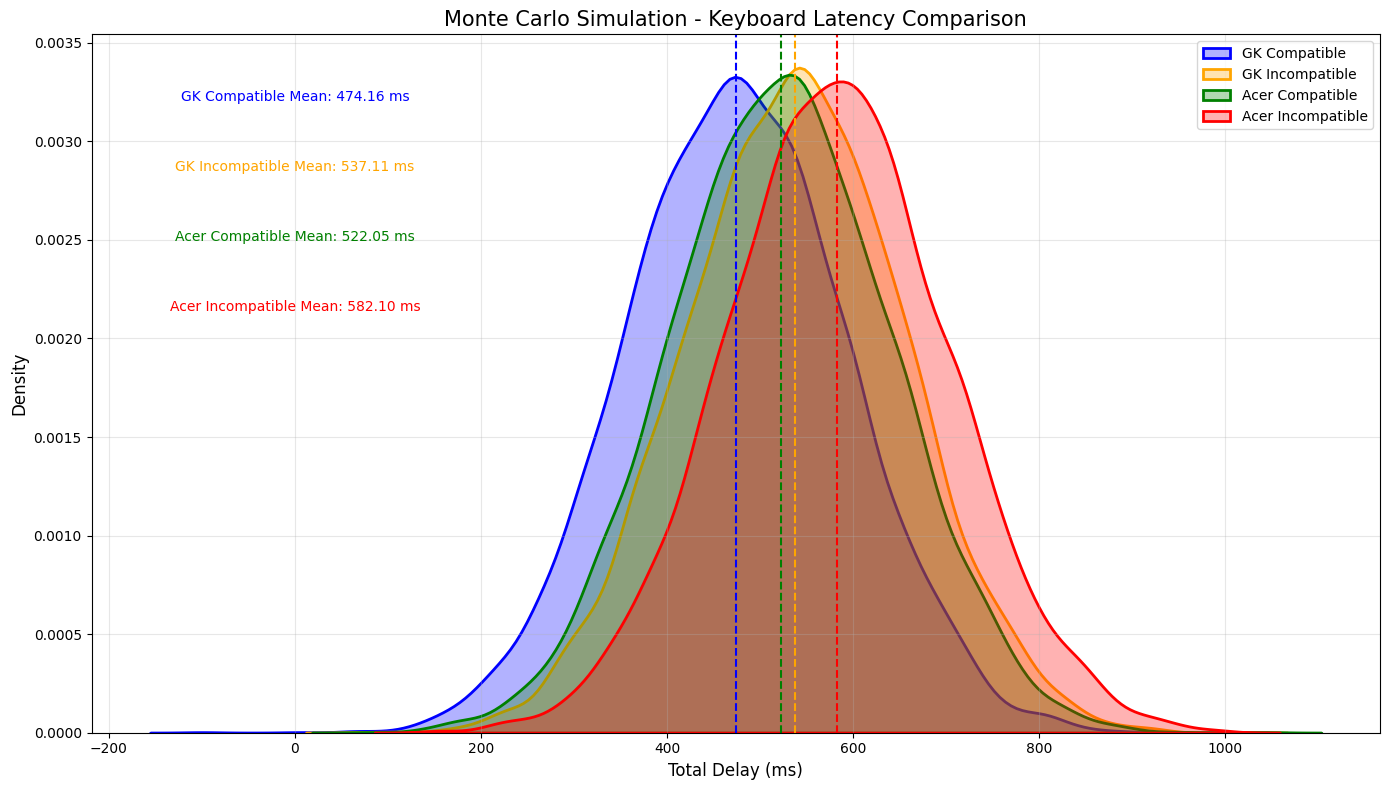

In [69]:
# Example configuration
gk_keyboard = {
    'gk_latency_mean_ms': gk_latency_mean_ms,
    'gk_latency_std_ms': gk_latency_std_ms,
    'compatible_mean': compatible_mean,
    'compatible_std': compatible_std,
    'incompatible_mean': incompatible_mean,
    'incompatible_std': incompatible_std,
    'label': 'GK',
    'compatible_color': 'blue',
    'incompatible_color': 'orange',
    'n_simulationen': n_simulationen
}

acer_keyboard = {
    'gk_latency_mean_ms': acer_latency_mean_ms,
    'gk_latency_std_ms': acer_latency_std_ms,
    'compatible_mean': compatible_mean,
    'compatible_std': compatible_std,
    'incompatible_mean': incompatible_mean,
    'incompatible_std': incompatible_std,
    'label': 'Acer',
    'compatible_color': 'green',
    'incompatible_color': 'red',
    'n_simulationen': n_simulationen
}

monte_carlo_kde_plot(gk_keyboard, acer_keyboard)